In [5]:
%matplotlib inline

import json
import math

import numpy
import matplotlib.pyplot as plot
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV#

In [6]:
with open('/data/share/text6_ml/pos_reviews.json') as data_file:    
    data_pos = json.load(data_file)
with open('/data/share/text6_ml/neg_reviews.json') as data_file:    
    data_neg = json.load(data_file)

In [7]:
pos_texts = list(data_pos.keys())
neg_texts = list(data_neg.keys())
all_texts = pos_texts + neg_texts

In [14]:
a = pd.to_datetime(['31.01.2019','05.01.2019'])


In [15]:
a[0].

1

In [8]:
target = [1]*1000 + [0]*1000

In [56]:
count_vect = CountVectorizer()
matrix_count = count_vect.fit_transform(all_texts).toarray()

In [20]:
#count_vect = CountVectorizer()
matrix_count = count_vect.transform(['наконец пришла весна']).toarray()
matrix_count.sum()

0

In [22]:
matrix_count.shape

(2000, 39659)

In [23]:
words = [x[0] for x in sorted(count_vect.vocabulary_.items(), key=lambda x: x[1])]
pd.DataFrame(matrix_count, columns=words).head(15)

,00,000,0009f,007,00s,03,04,05,05425,10,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
def cross_valid(matrix_counts, target, test_size=0.3, random_state=7):
    X_train, X_test, Y_train, Y_test = train_test_split(matrix_counts, target, 
                                                        test_size=test_size,
                                                        stratify=target, random_state=random_state)
    return (X_train, X_test, Y_train, Y_test)

In [57]:
X_train, X_test, Y_train, Y_test = cross_valid(matrix_count, target, test_size=0.25)

In [34]:
sum(Y_train)

900

In [47]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
predict = model.predict_proba(X_test)

In [37]:
precision, recall, _ = metrics.precision_recall_curve(Y_test, predict[:,1])

(0.0, 1)

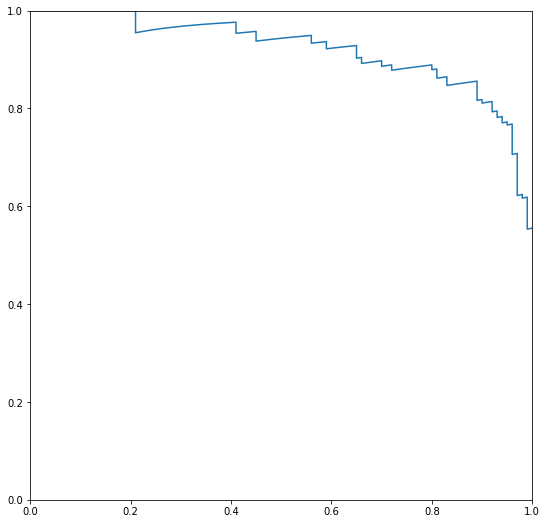

In [38]:
plot.figure(figsize = (9,9))
plot.plot(recall, precision, label='R-P')

plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1])

In [39]:
def roc_curve(title, Y_test, predicted, label='?'):
    fpr, tpr, th = metrics.roc_curve(Y_test, predicted[:,1])
    plot.plot(fpr, tpr, label=label);
    plot.xlabel('False Positive'); plot.ylabel('True Positive'); plot.title(title)
    plot.legend(bbox_to_anchor=(1, 1), loc=2); plot.xlim([0.0, 1.0]); plot.ylim([0.0, 1]);
    print ('(Logistic Regression (', label, ') AUC = ', metrics.auc(fpr, tpr))

(Logistic Regression ( ? ) AUC =  0.9091840000000001


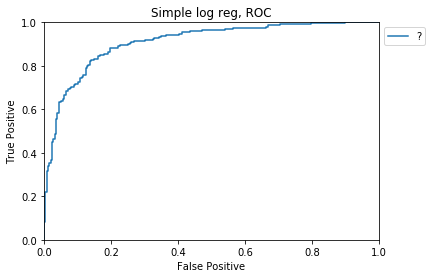

In [48]:
roc_curve('Simple log reg, ROC', Y_test, predict)

Как же объединить COuntVectorizer и модель воедино? Авторы sklearn и тут нам помогут

In [44]:
from sklearn.pipeline import Pipeline# , FeatureUnion


In [45]:
p = Pipeline(
    [('cv', CountVectorizer()),
    ('logreg', LogisticRegression())])
p

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [50]:
X_train, X_test, Y_train, Y_test = cross_valid(all_texts, target, test_size=0.25)

In [51]:
p.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [52]:
predict = p.predict_proba(X_test)

(Logistic Regression ( ? ) AUC =  0.9091840000000001


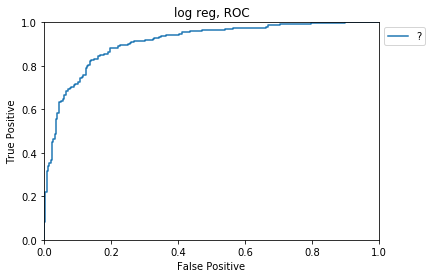

In [53]:
roc_curve('log reg, ROC', Y_test, predict)


Регуляризация логрег

In [58]:
model_l1 = LogisticRegression(penalty='l1')
model_l1.fit(X_train, Y_train)
predict_l1 = model_l1.predict_proba(X_test)

In [59]:
model_l2 = LogisticRegression(penalty='l2')
model_l2.fit(X_train, Y_train)
predict_l2 = model_l2.predict_proba(X_test)

(Logistic Regression ( l2 ) AUC =  0.9091840000000001
(Logistic Regression ( l1 ) AUC =  0.879872


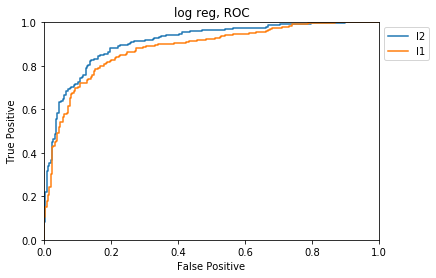

In [60]:
roc_curve('log reg, ROC', Y_test, predict_l2, label='l2')
roc_curve('log reg, ROC', Y_test, predict_l1, label='l1')

In [61]:
def report_cross_validation(grid_searcher, X_test, Y_test):
    print ('train score is {:.5f}'.format(grid_searcher.best_score_))
    print ('test score is {:.5f}'.format(grid_searcher.score(X_test, Y_test)))
    print ('best parameter set:')
    for k in sorted(grid_searcher.best_params_):
        print (' * {}={}'.format(k, grid_searcher.best_params_[k]))

In [62]:
count_vect = CountVectorizer()
matrix_count = count_vect.fit_transform(all_texts).toarray()
X_train, X_test, Y_train, Y_test = cross_valid(matrix_count, target, test_size=0.25)

In [63]:
c = [2**(x/10.0) for x in range(-100, 150, 50)]
c

[0.0009765625, 0.03125, 1.0, 32.0, 1024.0]

In [64]:
%%time
c = [2**(x/10.0) for x in range(-100, 150, 50)]

grid_searcher = GridSearchCV(
    estimator=LogisticRegression(), 
    param_grid={
        'C': c,
        'penalty': ['l1', 'l2']
    }, 
    scoring='roc_auc', cv=5, n_jobs=4).fit(X_train, Y_train)
report_cross_validation(grid_searcher, X_test, Y_test)

train score is 0.92259
test score is 0.92262
best parameter set:
 * C=1024.0
 * penalty=l1
CPU times: user 49.5 s, sys: 1.66 s, total: 51.2 s
Wall time: 1min 25s


L1 max auc = 0.9225866666666666 with c =  1024.0 2^ 10.0
L2 max auc = 0.9084177777777779 with c =  1.0 2^ 0.0


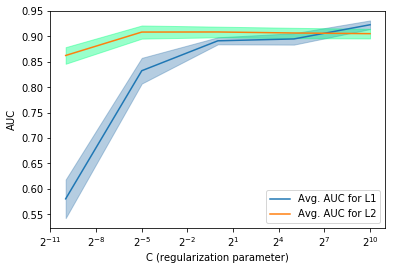

In [65]:
l1_mean = numpy.array([x.mean_validation_score for x in grid_searcher.grid_scores_ if x.parameters['penalty'] == 'l1'])
l2_mean = numpy.array([x.mean_validation_score for x in grid_searcher.grid_scores_ if x.parameters['penalty'] == 'l2'])
l1_std = numpy.array([x.cv_validation_scores.std() for x in grid_searcher.grid_scores_ if x.parameters['penalty'] == 'l1'])
l2_std = numpy.array([x.cv_validation_scores.std() for x in grid_searcher.grid_scores_ if x.parameters['penalty'] == 'l2'])
print ("L1 max auc =", l1_mean.max(), "with c = ", c[numpy.where(l1_mean==l1_mean.max())[0][0]], "2^", math.log(c[numpy.where(l1_mean==l1_mean.max())[0][0]], 2))
print ("L2 max auc =", l2_mean.max(), "with c = ", c[numpy.where(l2_mean==l2_mean.max())[0][0]], "2^", math.log(c[numpy.where(l2_mean==l2_mean.max())[0][0]], 2))
plot.fill_between(c, l1_mean - l1_std, l1_mean + l1_std, color = 'steelblue', alpha = .4)
plot.plot(c, l1_mean, label='Avg. AUC for L1')
plot.xscale('log', basex=2); plot.legend(loc=4);
plot.xlabel('C (regularization parameter)'); plot.ylabel('AUC'); 
plot.fill_between(c, l2_mean - l2_std, l2_mean + l2_std, color = 'springgreen', alpha = .4)
plot.plot(c, l2_mean, label='Avg. AUC for L2')
plot.xscale('log', basex=2); plot.legend(loc=4);
plot.xlabel('C (regularization parameter)'); plot.ylabel('AUC'); 

Интерпретируемость моделей в применении к анализу текстов

In [66]:
import numpy

print ('\n', 'TOP 10 pos')
for idx in numpy.argsort(model.coef_)[0][::-1][:10]: # последние 10 с максимальным коэфициентом
    print ('{}, importance = {:.5f}'.format(words[idx], model.coef_[0][idx]))
print ('\n', 'TOP 10 neg')
for idx in numpy.argsort(model.coef_)[0][:10]: # последние 10 с минимальным коэфициентом
    print ('{}, importance = {:.5f}'.format(words[idx], model.coef_[0][idx]))


 TOP 10 pos
fun, importance = 0.52477
seen, importance = 0.46650
life, importance = 0.45581
back, importance = 0.43937
bit, importance = 0.39175
great, importance = 0.39093
quite, importance = 0.36711
different, importance = 0.34496
will, importance = 0.34205
perfectly, importance = 0.33154

 TOP 10 neg
bad, importance = -0.73601
nothing, importance = -0.47295
worst, importance = -0.47295
unfortunately, importance = -0.46891
waste, importance = -0.44592
any, importance = -0.43175
boring, importance = -0.41491
script, importance = -0.41332
plot, importance = -0.40601
poor, importance = -0.40399


Удалим стоп-слова

In [67]:
count_vect_WOSW = CountVectorizer(stop_words='english')
matrix_count_WOSW = count_vect_WOSW.fit_transform(all_texts).toarray()

X_train_WOSW, X_test_WOSW, Y_train_WOSW, Y_test_WOSW = cross_valid(matrix_count_WOSW, target, test_size=0.3)

model_WOSW = LogisticRegression()
model = LogisticRegression()


model_WOSW.fit(X_train_WOSW, Y_train_WOSW)
model.fit(X_train, Y_train)
predict = model.predict_proba(X_test)
predict_WOSW = model_WOSW.predict_proba(X_test_WOSW)

In [71]:
matrix_count_WOSW.shape

(2000, 39354)

(Logistic Regression ( l2 ) AUC =  0.9091840000000001
(Logistic Regression ( l2 WOSW ) AUC =  0.9056777777777778


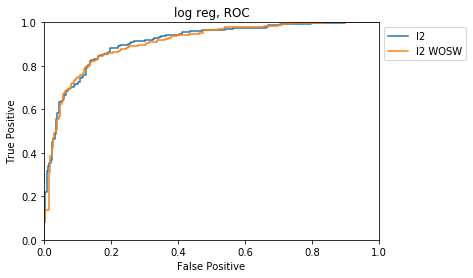

In [69]:
roc_curve('log reg, ROC', Y_test, predict, label='l2')
roc_curve('log reg, ROC', Y_test_WOSW, predict_WOSW, label='l2 WOSW')

In [73]:
stops = set(count_vect.vocabulary_) - set(count_vect_WOSW.vocabulary_)
'will' in stops

True

In [75]:
words = [x[0] for x in sorted(count_vect_WOSW.vocabulary_.items(), key=lambda x: x[1])]

print ('\n', 'TOP 10 pos')
for idx in numpy.argsort(model_WOSW.coef_)[0][::-1][:10]: # последние 10 с максимальным коэфициентом
    print ('{}, importance = {:.5f}'.format(words[idx], model_WOSW.coef_[0][idx]))
print ('\n', 'TOP 10 neg')
for idx in numpy.argsort(model_WOSW.coef_)[0][:10]: # последние 10 с минимальным коэфициентом
    print ('{}, importance = {:.5f}'.format(words[idx], model_WOSW.coef_[0][idx]))


 TOP 10 pos
fun, importance = 0.65957
different, importance = 0.48209
great, importance = 0.46103
life, importance = 0.46033
bit, importance = 0.44236
quite, importance = 0.41312
performances, importance = 0.41106
job, importance = 0.41022
seen, importance = 0.39023
overall, importance = 0.38130

 TOP 10 neg
bad, importance = -0.72444
supposed, importance = -0.56917
worst, importance = -0.55433
reason, importance = -0.52606
waste, importance = -0.50894
unfortunately, importance = -0.50786
plot, importance = -0.48910
boring, importance = -0.48718
script, importance = -0.42400
awful, importance = -0.42304


In [ ]:
sum(Y_test)

In [76]:
def logistic_reg(X_train, X_test, Y_train, **kwargs):
    model_logistic = LogisticRegression(**kwargs)
    model_logistic.fit(X_train, Y_train)
    predicted = model_logistic.predict_proba(X_test)
    return predicted, model_logistic

In [77]:
def get_auc(Y_test, predicted):
    fpr, tpr, _ = metrics.roc_curve(Y_test, predicted[:,1])
    return metrics.auc(fpr, tpr)

Можно варьировать max_features

In [79]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


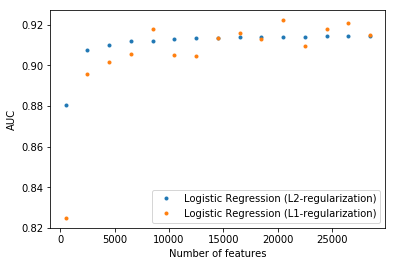

In [78]:
auc_map = {}
for i in range(500,30000,2000):
    count_vect_top_temp = CountVectorizer(max_features=i)
    matrix_counts_top_temp = count_vect_top_temp.fit_transform(all_texts).toarray()
    X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts_top_temp, target)
    logreg_count_top_temp_predicted, _ = logistic_reg(X_train, X_test, Y_train, penalty='l1', C=1024)
    auc_map[i] = get_auc(Y_test, logreg_count_top_temp_predicted)
    
auc_map2 = {}
for i in range(500,30000,2000):
    count_vect_top_temp = CountVectorizer(max_features=i)
    matrix_counts_top_temp = count_vect_top_temp.fit_transform(all_texts).toarray()
    X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts_top_temp, target)
    logreg_count_top_temp_predicted, _ = logistic_reg(X_train, X_test, Y_train, C=0.03125)
    auc_map2[i] = get_auc(Y_test, logreg_count_top_temp_predicted)
    
plot.plot(auc_map2.keys(), auc_map2.values(), '.', label='Logistic Regression (L2-regularization)')
plot.plot(auc_map.keys(), auc_map.values(), '.', label='Logistic Regression (L1-regularization)')
plot.xlabel('Number of features'); plot.ylabel('AUC'); 
plot.legend(loc=0);

Можно бинаризовать вектора, можно брать логарифмы частот вместо частот, можно TF-IDF. Сравним эти подходы.

In [80]:
matrix_counts = matrix_count
X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts, target)
logreg_counts_l2_predicted, _ = logistic_reg(X_train, X_test, Y_train, C=0.03125)

def bin_f(x):
    return 1 if x > 0 else 0
n_vec_bin = numpy.vectorize(bin_f)
matrix_counts_bin = n_vec_bin(matrix_counts)
X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts_bin, target)
binreg_bincounts_l2_predicted, _ = logistic_reg(X_train, X_test, Y_train, C=0.03125)

import math

def log_f(x):
    return math.log(x+1)
n_vec_log = numpy.vectorize(log_f)
matrix_counts_log = n_vec_log(matrix_counts)
X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts_log, target)
logreg_logcounts_l2_predicted, _ = logistic_reg(X_train, X_test, Y_train, C=0.03125)

tfidf_vec = TfidfVectorizer()
matrix_tfidf = tfidf_vec.fit_transform(all_texts).toarray()
X_train, X_test, Y_train, Y_test = cross_valid(matrix_tfidf, target)
logreg_counts_l2_predicted_tfidf, _ = logistic_reg(X_train, X_test, Y_train, C=0.03125)

(Logistic Regression ( freq ) AUC =  0.9142444444444445
(Logistic Regression ( binary ) AUC =  0.9362444444444444
(Logistic Regression ( logfreq ) AUC =  0.9273222222222222
(Logistic Regression ( tf-idf ) AUC =  0.8906444444444445


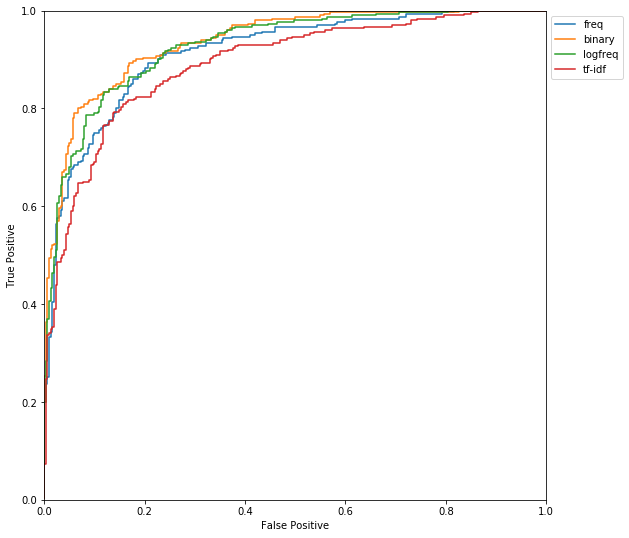

In [84]:
from matplotlib import pyplot as plt
plt.figure(figsize=(9,9))
roc_curve('', Y_test, logreg_counts_l2_predicted, label='freq')
roc_curve('', Y_test, binreg_bincounts_l2_predicted, label='binary')
roc_curve('', Y_test, logreg_logcounts_l2_predicted, label='logfreq')
roc_curve('', Y_test, logreg_counts_l2_predicted_tfidf, label='tf-idf')

Не забываем про стемминг и морфоанализ

In [ ]:
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import string
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [i for i in tokens if i not in string.punctuation]
    stems = stem_tokens(tokens, stemmer)
    return stems


count_vect_without_stopwords = CountVectorizer(stop_words='english')
matrix_counts_without_stopwords = count_vect_without_stopwords.fit_transform(all_texts).toarray()

count_vect_with_lemm = CountVectorizer(tokenizer=tokenize)
matrix_counts_with_lemm = count_vect_with_lemm.fit_transform(all_texts).toarray()

count_vect_with_lemm_without_stopwords = CountVectorizer(stop_words='english', tokenizer=tokenize)
matrix_counts_with_lemm_without_stopwords = count_vect_with_lemm_without_stopwords.fit_transform(all_texts).toarray()


X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts, target)
logreg_counts_l2_predicted, _ = logistic_reg(X_train, X_test, Y_train, C=0.02915728098552524)

X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts_without_stopwords, target)
logreg_counts_l2_predicted_without_stopwords, _ = logistic_reg(X_train, X_test, Y_train, C=0.02915728098552524)

X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts_with_lemm, target)
logreg_counts_l2_predicted_with_lemm, _ = logistic_reg(X_train, X_test, Y_train, C=0.02915728098552524)

X_train, X_test, Y_train, Y_test = cross_valid(matrix_counts_with_lemm_without_stopwords, target)
logreg_counts_l2_predicted_with_lemm_without_stopwords, _ = logistic_reg(X_train, X_test, Y_train, C=0.02915728098552524)

roc_curve('',Y_test, logreg_counts_l2_predicted, label='all')
roc_curve('',Y_test, logreg_counts_l2_predicted_without_stopwords, label='w/o stop-words')
roc_curve('',Y_test, logreg_counts_l2_predicted_with_lemm, label='w/ stemming')
roc_curve('',Y_test, logreg_counts_l2_predicted_with_lemm_without_stopwords, label='w/ stemming\nw/o stop-words')